<center><h1> Webscraping Project - Lululemon</h1> </center>

<center><h3> Maggie Han </h3> </center>

# Table of Contents

1. [Import required libraries](#1.-Import-requried-libraries)
2. [Data scraping](#2.-Data-scraping)
    - [2.1 Setup soup and driver](#2.1.-Setup-soup-and-driver)
    - [2.2 Open a driver](#2.2-Open-a-driver)
    - [2.3 Scroll down to the bottom](#2.3-Scroll-down-to-the-bottom)
    - [2.4 Find all urls](#2.4-Find-all-urls)
    - [2.5 Create dictionary to store values](#2.5-Create-dictionary-to-store-values)
    - [2.6 Extract all info from Womens](#2.6-Extract-all-info-from-Womens)
    - [2.7 Extract all info from Mens](#2.7-Extract-all-info-from-Mens)
3. [Data cleaning](#3.-Data-cleanup)
4. [Analysis and Graphics](#4.-Analysis-and-Graphics)
    - [4.1 Catagory Distribution](#4.1-Catagory-Distribution)
    - [4.1.1 Catagory Distribution in Women](#4.1.1-Catagory-Distribution-in-Women)
    - [4.1.2 Catagory Distribution in Men](#4.1.2-Catagory-Distribution-in-Men)
    - [4.2 Price range of products in each catagory](#4.2-Price-range-of-products-in-each-catagory)
    - [4.3 Product review analysis](#4.3-Product-review-analysis)
    - [4.3.1 Catagory distribution of top reviewed products](#4.3.1-Catagory-distribution-of-top-reviewed-products)
    - [4.3.2 Top reviewed products for womens](#4.3.2-Top-reviewed-products-for-womens)
    - [4.3.3 Price of women's clothes filtered by top review](#4.3.3-Price-of-women's-clothes-filtered-by-top-review)
    - [4.4 Relation of prices and reviews for most populared products](#4.4-Relation-of-prices-and-reviews-for-most-populared-products)
    - [4.5 Relation of Review and Review amounts](#4.5-Relation-of-Review-and-Review-amounts)

## 1. Import requried libraries

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import re # For regular expression
import matplotlib.pyplot as plt
%matplotlib inline

s = Service('Users\Hanme\Desktop\WeCloudData\week2_Python\chromedriver_win32\chromedriver.exe')

## 2. Data scraping

### 2.1 Setup soup and driver

In [2]:
#Test: get links for all womens
url = 'https://shop.lululemon.com/c/women/_/N-7z5'
result = requests.get(url)
soup = BeautifulSoup(result.content)

In [ ]:
# test status of beautifulsoup
result.status_code

### 2.2 Open a webdriver

In [3]:
driver = webdriver.Chrome(service=s)

### 2.3 Scroll down to the bottom

In [30]:
driver.get('https://shop.lululemon.com/c/women/_/N-7z5')

In [4]:
driver.get('https://shop.lululemon.com/c/men/_/N-7qr')

In [5]:
scroll_pause_time = 2 # set pause time
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
i = 1

while True:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
    i += 1
    sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # Find the button element
    button = soup.find('button', {'class': 'iconButtonIcon-3D2lQ'})
    # Scroll to the button element using Selenium
    try:
        button_element = driver.find_element(By.XPATH, '//*[@id="main-content"]/div/section/div/div[2]/button/div/span')
        # Click the button
        button_element.click()
    except:
        #button not exist
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        break
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break

### 2.4 Find all urls

In [6]:
#product tag
a_tags = soup.find_all('a', class_= 'link lll-font-weight-medium')

In [7]:
# grab all the links
links = []

for tag in a_tags:
    link = tag.get('href')
    link = 'https://shop.lululemon.com'+ link +'?color=0001'
    links.append(link)

In [8]:
#test: check links
links

['https://shop.lululemon.com/p/mens-jackets-and-hoodies-hoodies/City-Sweat-Pullover-Hoodie/_/prod7390091?color=34204?color=0001',
 'https://shop.lululemon.com/p/men-shorts/City-Sweat-Short/_/prod8910008?color=32798?color=0001',
 'https://shop.lululemon.com/p/men-pants/Utilitech-Pull-On-Relaxed-Pant-27/_/prod11110110?color=43731?color=0001',
 'https://shop.lululemon.com/p/mens-jackets-and-hoodies-jackets/Switch-Over-Bomber/_/prod9270190?color=36763?color=0001',
 'https://shop.lululemon.com/p/mens-jackets-and-hoodies-hoodies/French-Terry-oversized-Half-Zip/_/prod11380254?color=50100?color=0001',
 'https://shop.lululemon.com/p/mens-ss-tops/The-Fundamental-Pocket-T-Shirt/_/prod10642984?color=34563?color=0001',
 'https://shop.lululemon.com/p/mens-jackets-and-hoodies-hoodies/FT-Oversized-Pullover-Hoodie/_/prod11380364?color=47870?color=0001',
 'https://shop.lululemon.com/p/men-shorts/Relaxed-Fit-French-Terry-Short-9/_/prod11020919?color=34975?color=0001',
 'https://shop.lululemon.com/p/mens-

In [9]:
#test: check num of links
len(links)

578

In [11]:
#Find the screen height
driver.execute_script("return window.screen.height;")

601

In [12]:
#scroll down to allow review present in the page
driver.execute_script("window.scrollTo(0, 2200)")

### 2.5 Create dictionary to store values

In [10]:
info = {
    'gender':[],
    'catagory':[],
    'sub_cata':[],
    'products':[],
    'prices':[],
    'reviews':[],
    'num_of_review':[]
}

### 2.6 Extract all info from Womens

In [41]:
# Initialize the line number
line_num = 0

# Set up for loop to iterate through all links
for link in links:
    
    driver.get(link)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    # as gender, catagory and sub_cata share the same class, using a for loop to find all
    i = 0
    try:
        for header in soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'):
            if i == 0 :
                info['gender'].append(header.get_text())
                i += 1
                print(header.get_text())
            elif i == 1:
                info['catagory'].append(header.get_text())
                i += 1
                print(header.get_text())
            else:
                info['sub_cata'].append(header.get_text())
                print(header.get_text())

        # for products with no catagory and sub_cata 
        if len(soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'))== 1 :
            info['catagory'].append('NA')
            print('NA')
            info['sub_cata'].append('NA')
            print('NA')

        # for products with no sub_cata
        if len(soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'))== 2 :
            info['sub_cata'].append('NA')
            print('NA')
    
    # for links may not exist anymore and being updated during the scarping process 
    except:
        info['gender'].append('NA')
        print('NA')        
        info['catagory'].append('NA')
        print('NA')
        info['sub_cata'].append('NA')
        print('NA')
    
    #save product name
    try:
        product = soup.find('h1',class_ = 'OneLinkNoTx product-title_title__i8NUw').get_text()
        info['products'].append(product)
        print(product)
    except:
        info['products'].append('NA')
        print('NA')
    
    #save price
    try:
        price = soup.find('span', class_= 'price-1jnQj price').get_text()
        info['prices'].append(price)
        print(price)
    except:
        info['prices'].append('NA')
        print('NA')
    
    # setup driver for finding review and num_of_reviews, as they don't have class and cannot be found using beautiful soup
    # move the page down to allow review present in the screen to avoid 'no such element expectation' error
    driver.execute_script("window.scrollTo(0, 2200)")
    sleep(2)

    # collect review point
    try:
        review = driver.find_element(By.XPATH,'//*[@id="main-content"]/div[1]/section/div[4]/div/div/div/div/div/div/div[1]/span[1]/span').text
        info['reviews'].append(review)
        print(review)
    except:
        info['reviews'].append('NA')
        print('NA')
    
    # collect number of reviews
    try:
        num = driver.find_element(By.XPATH, '//*[@id="main-content"]/div[1]/section/div[4]/div/div/div/div/div/div/div[1]/div').text
        info['num_of_review'].append(num)
        print(num)
    except:
        info['num_of_review'].append('NA')
        print('NA')
    
    line_num += 1
    print(line_num)
    
    # save to csv every 20 products
    if line_num % 20 == 0:
        # save data to dataframe
        df = pd.DataFrame(info)
        df.to_csv('womens.csv',index=False,mode='a',header=False)
        
        # initialize dictionary for next iteration
        info = {
            'gender':[],
            'catagory':[],
            'sub_cata':[],
            'products':[],
            'prices':[],
            'reviews':[],
            'num_of_review':[]
        }
        
    # for last few lines
    if line_num == len(links):
        # save to dataframe
        df = pd.DataFrame(info)
        df.to_csv('womens.csv',index=False,mode='a',header=False)
        
        sleep(2)
        driver.close()

Women's Clothes
Shirts
Long Sleeve Shirts
Ebb to Street Waist-Length Long-Sleeve Shirt
$88 CAD
4.1
Based on 19 Reviews
1
Women's Clothes
Underwear
NA
UnderEase High-Rise Bikini Underwear 3 Pack
$48 CAD
3.8
Based on 13 Reviews
2
Women's Clothes
Coats & Jackets
NA
Wunder Puff Long Jacket
$398 CAD
4.2
Based on 692 Reviews
3
Women's Clothes
Pants
NA
Groove High-Rise Split-Hem Flared Pant Nulu
$128 CAD
4.5
Based on 4 Reviews
4
Women's Clothes
Shirts
T-Shirts
All Yours Cropped T-Shirt Online Only
$48 CAD
4.3
Based on 160 Reviews
5
Women's Clothes
Pants
Leggings
lululemon Align™ V-Waist Crop 23"
$118 CAD
4.5
Based on 20 Reviews
6
Women's Clothes
Sports Bras
NA
Flow Y Nulu Longline Bra Light Support, A–C Cups Online Only
$64 CAD
3.7
Based on 202 Reviews
7
Women's Clothes
Underwear
NA
InvisiWear High-Rise Bikini Underwear 3 Pack
$48 CAD
3.1
Based on 11 Reviews
8
Women's Clothes
Pants
NA
Light Utilitech Cargo Pocket High-Rise Pant
$158 CAD
4.2
Based on 198 Reviews
9
Women's Clothes
Pants
Sweatpa

### 2.7 Extract all info from Mens

In [11]:
# Initialize the line number
line_num = 0

# Set up for loop to iterate through all links
for link in links:
    
    driver.get(link)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    # as gender, catagory and sub_cata share the same class, using a for loop to find all these headers and put them in each column
    i = 0
    try:
        for header in soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'):
            if i == 0 :
                info['gender'].append(header.get_text())
                i += 1
                print(header.get_text())
            elif i == 1:
                info['catagory'].append(header.get_text())
                i += 1
                print(header.get_text())
            else:
                info['sub_cata'].append(header.get_text())
                print(header.get_text())

        # for products with no catagory and sub_cata
        if len(soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'))== 1 :
            info['catagory'].append('NA')
            print('NA')
            info['sub_cata'].append('NA')
            print('NA')

        # for products with no sub_cata
        if len(soup.find('ul',class_='breadcrumbs-FTRV6 breadcrumbs').find_all('li'))== 2 :
            info['sub_cata'].append('NA')
            print('NA')
    
    # for links may not exist anymore and being updated during the scarping process
    except:
        info['gender'].append('NA')
        print('NA')        
        info['catagory'].append('NA')
        print('NA')
        info['sub_cata'].append('NA')
        print('NA')
    
    #save product name
    try:
        product = soup.find('h1',class_ = 'OneLinkNoTx product-title_title__i8NUw').get_text()
        info['products'].append(product)
        print(product)
    except:
        info['products'].append('NA')
        print('NA')
        
    #save price
    try:
        price = soup.find('span', class_= 'price-1jnQj price').get_text()
        info['prices'].append(price)
        print(price)
    except:
        info['prices'].append('NA')
        print('NA')
    
    # setup driver for finding review and num_of_reviews, as they don't have class and cannot be found using beautiful soup
    # move the page down to allow review present in the screen to avoid 'no such element expectation' error
    driver.execute_script("window.scrollTo(0, 2200)")
    sleep(2)

    # collect review point
    try:
        review = driver.find_element(By.XPATH,'//*[@id="main-content"]/div[1]/section/div[4]/div/div/div/div/div/div/div[1]/span[1]/span').text
        info['reviews'].append(review)
        print(review)
    except:
        info['reviews'].append('NA')
        print('NA')
    
    # collect number of reviews
    try:
        num = driver.find_element(By.XPATH, '//*[@id="main-content"]/div[1]/section/div[4]/div/div/div/div/div/div/div[1]/div').text
        info['num_of_review'].append(num)
        print(num)
    except:
        info['num_of_review'].append('NA')
        print('NA')
    
    line_num += 1
    print(line_num)
    
    # save to csv every 20 products
    if line_num % 20 == 0:
        # save data to dataframe
        df = pd.DataFrame(info)
        df.to_csv('mens.csv',index=False,mode='a',header=False)
        
        # initialize dictionary for next iteration
        info = {
            'gender':[],
            'catagory':[],
            'sub_cata':[],
            'products':[],
            'prices':[],
            'reviews':[],
            'num_of_review':[]
        }
        
    # for last few lines
    if line_num == len(links):
        # save to dataframe
        df = pd.DataFrame(info)
        df.to_csv('mens.csv',index=False,mode='a',header=False)
        
        sleep(2)
        driver.close()

Men's Clothes
Hoodies & Sweatshirts
NA
City Sweat Pullover Hoodie
$128 CAD
4.2
Based on 490 Reviews
1
Men's Clothes
Shorts
NA
City Sweat Short 9" Online Only
$68 CAD
4.3
Based on 226 Reviews
2
Men's Clothes
Pants
NA
Utilitech Pull-On Relaxed-Fit Pant Online Only
$138 CAD
4.3
Based on 14 Reviews
3
Men's Clothes
Coats & Jackets
NA
Switch Over Bomber Jacket Cotton Blend
$198 CAD
4.4
Based on 18 Reviews
4
Men's Clothes
Hoodies & Sweatshirts
NA
French Terry Oversized Half Zip
$148 CAD
5.0
Based on 2 Reviews
5
Men's Clothes
Shirts
Short Sleeve Shirts
lululemon Fundamental Pocket T-Shirt
$74 CAD
3.5
Based on 74 Reviews
6
Men's Clothes
Hoodies & Sweatshirts
NA
French Terry Oversized Pullover Hoodie Online Only
$158 CAD
3.0
Based on 2 Reviews
7
Men's Clothes
Shorts
NA
Relaxed French Terry Short 9" Online Only
$88 CAD
4.2
Based on 19 Reviews
8
Men's Clothes
Pants
Sweatpants
City Sweat Jogger Tall Online Only
$128 CAD
4.4
Based on 288 Reviews
9
Men's Clothes
Shirts
Short Sleeve Shirts
Airing Easy

In [19]:
# test: check data frame
pd.DataFrame.from_dict(info)

,gender,catagory,sub_cata,products,prices,reviews,num_of_review
0,Men's Clothes,Socks,NA,Team Canada Men's Daily Stride Boot Crew Sock ...,Sale Price $14 CAD Regular Price $28 CAD,NA,NA
1,Men's Clothes,Socks,NA,Men's Power Stride Tab Sock 5 Pack,Sale Price $39 CAD Regular Price $58 CAD,3.8,Based on 66 Reviews
2,Men's Clothes,Socks,NA,Men's Find Your Balance Studio Tab Sock,Sale Price $19 CAD Regular Price $28 CAD,1.7,Based on 7 Reviews
3,Accessories,Bags,NA,Future Legacy Crossbody Bag,Sale Price $19 CAD Regular Price $38 CAD,4.5,Based on 607 Reviews
4,Accessories,Hats,NA,Team Canada Wool-Blend Reversible Beanie COC L...,Sale Price $19 CAD Regular Price $48 CAD,4.5,Based on 8 Reviews
5,Accessories,Hats,NA,Out Run Beanie,Sale Price $19 CAD Regular Price $36 CAD,NA,NA
6,Accessories,Bags,NA,You Hold the Keychain 2.0,Sale Price $9 CAD Regular Price $18 CAD,NA,NA
7,Accessories,Hats,NA,Team Canada Quilted Trapper Hat COC Logo Onlin...,Sale Price $39 CAD Regular Price $68 CAD,NA,NA
8,Accessories,Hats,NA,Team Canada Race Kit Hat COC Logo Online Only,Sale Price $19 CAD Regular Price $52 CAD,NA,NA
9,Accessories,Hats,NA,Men's Cold Terrain Running Ear Warmer,Sale Price $19 CAD Regular Price $28 CAD,NA,NA


## 3. Data cleanup 

### 3.1 Reading csv Into Pandas DataFrame

In [7]:
#rename table headings
womens = pd.read_csv('womens.csv', names = ['catagory', 'sub_cata_1', 'sub_cata_2', 'product', 'price', 'review', 'review_num'])
womens.head()

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Mini Flared Pant 32""",$128 CAD,3.9,Based on 584 Reviews
1,Women's Clothes,Coats & Jackets,NaN,Quilted Light Insulation Jacket,$228 CAD,3.8,Based on 63 Reviews
2,Women's Clothes,Shirts,Long Sleeve Shirts,Back in Action Long-Sleeve Shirt Nulu,$78 CAD,4.4,Based on 275 Reviews
3,Women's Clothes,Hoodies & Sweatshirts,NaN,Scuba Oversized Funnel Neck Half Zip,$118 CAD,4.5,Based on 1704 Reviews
4,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Pant 25""",$98 - $128 CAD,NaN,NaN


In [8]:
#rename table headings
mens = pd.read_csv('mens.csv', names = ['catagory', 'sub_cata_1', 'sub_cata_2', 'product', 'price', 'review', 'review_num'])
mens.head()

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Men's Clothes,Hoodies & Sweatshirts,NaN,City Sweat Pullover Hoodie,$128 CAD,4.2,Based on 490 Reviews
1,Men's Clothes,Shorts,NaN,"City Sweat Short 9"" Online Only",$68 CAD,4.3,Based on 226 Reviews
2,Men's Clothes,Pants,NaN,Utilitech Pull-On Relaxed-Fit Pant Online Only,$138 CAD,4.3,Based on 14 Reviews
3,Men's Clothes,Coats & Jackets,NaN,Switch Over Bomber Jacket Cotton Blend,$198 CAD,4.4,Based on 18 Reviews
4,Men's Clothes,Hoodies & Sweatshirts,NaN,French Terry Oversized Half Zip,$148 CAD,5.0,Based on 2 Reviews


In [10]:
#check data types
womens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   catagory    1198 non-null   object 
 1   sub_cata_1  1179 non-null   object 
 2   sub_cata_2  508 non-null    object 
 3   product     1198 non-null   object 
 4   price       1199 non-null   object 
 5   review      1078 non-null   float64
 6   review_num  1078 non-null   object 
dtypes: float64(1), object(6)
memory usage: 65.8+ KB


In [11]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   catagory    577 non-null    object 
 1   sub_cata_1  564 non-null    object 
 2   sub_cata_2  190 non-null    object 
 3   product     577 non-null    object 
 4   price       577 non-null    object 
 5   review      526 non-null    float64
 6   review_num  526 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.7+ KB


### 3.2 Convert `str` type to `int` in `review_num` column

In [9]:
#make a copy of dateframe
women = womens
men = mens

In [13]:
# extract number
# fill na to 0
# convert object to int
women['review_num']= women['review_num'].str.extract('(\d+)').fillna(0).astype(int)
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   catagory    1198 non-null   object 
 1   sub_cata_1  1179 non-null   object 
 2   sub_cata_2  508 non-null    object 
 3   product     1198 non-null   object 
 4   price       1199 non-null   object 
 5   review      1078 non-null   float64
 6   review_num  1200 non-null   int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 61.1+ KB


In [14]:
# extract number
# fill na to 0
# convert object to int
men['review_num']= men['review_num'].str.extract('(\d+)').fillna(0).astype(int)
men.head()

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Men's Clothes,Hoodies & Sweatshirts,NaN,City Sweat Pullover Hoodie,$128 CAD,4.2,490
1,Men's Clothes,Shorts,NaN,"City Sweat Short 9"" Online Only",$68 CAD,4.3,226
2,Men's Clothes,Pants,NaN,Utilitech Pull-On Relaxed-Fit Pant Online Only,$138 CAD,4.3,14
3,Men's Clothes,Coats & Jackets,NaN,Switch Over Bomber Jacket Cotton Blend,$198 CAD,4.4,18
4,Men's Clothes,Hoodies & Sweatshirts,NaN,French Terry Oversized Half Zip,$148 CAD,5.0,2


### 3.3 Convert `str` type to `float` in  `price` column

In [15]:
# extract number from review_num using regexp and convert str to float
women['price'] = women['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
women.head()

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Mini Flared Pant 32""",128.0,3.9,584
1,Women's Clothes,Coats & Jackets,NaN,Quilted Light Insulation Jacket,228.0,3.8,63
2,Women's Clothes,Shirts,Long Sleeve Shirts,Back in Action Long-Sleeve Shirt Nulu,78.0,4.4,275
3,Women's Clothes,Hoodies & Sweatshirts,NaN,Scuba Oversized Funnel Neck Half Zip,118.0,4.5,1704
4,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Pant 25""",98.0,NaN,0


In [16]:
# extract number from review_num using regexp and convert str to float
men['price'] = men['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
men.head()

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Men's Clothes,Hoodies & Sweatshirts,NaN,City Sweat Pullover Hoodie,128.0,4.2,490
1,Men's Clothes,Shorts,NaN,"City Sweat Short 9"" Online Only",68.0,4.3,226
2,Men's Clothes,Pants,NaN,Utilitech Pull-On Relaxed-Fit Pant Online Only,138.0,4.3,14
3,Men's Clothes,Coats & Jackets,NaN,Switch Over Bomber Jacket Cotton Blend,198.0,4.4,18
4,Men's Clothes,Hoodies & Sweatshirts,NaN,French Terry Oversized Half Zip,148.0,5.0,2


### 3.4 Concat two tables into one and remove duplicates

In [18]:
#check length of women
len(women)

1200

In [19]:
#check length of men
len(men)

578

In [22]:
# concat two tables in one
products = pd.concat([women, men], axis = 0).drop_duplicates()

In [24]:
# save as csv and name products
products.to_csv('products.csv')

In [27]:
# check length of products
len(products)

1723

In [3]:
#read csv and name lululemon
lululemon = pd.read_csv('products.csv')

In [4]:
#make a copy
lulu = lululemon

In [5]:
# check distinct columns
lulu.columns.unique()

Index(['Unnamed: 0', 'catagory', 'sub_cata_1', 'sub_cata_2', 'product',
       'price', 'review', 'review_num'],
      dtype='object')

In [6]:
#drop column Unnamed: 0
lulu = lulu.drop('Unnamed: 0', axis = 1)

In [7]:
# check distinct catagory
lulu.catagory.unique()

array(["Women's Clothes", 'Shoes', nan, "Men's Clothes", 'Accessories'],
      dtype=object)

In [8]:
# drop rows that empty in catagory
lulu = lulu.dropna(subset=['catagory'])

In [9]:
#fill Na in review to 0
lulu['review'] = lulu['review'].fillna(0)

In [10]:
# sort_values
lulu = lulu.sort_values(by = ['catagory', 'sub_cata_1', 'sub_cata_2'])

## 4. Analysis and Graphics

### 4.1 Catagory Distribution

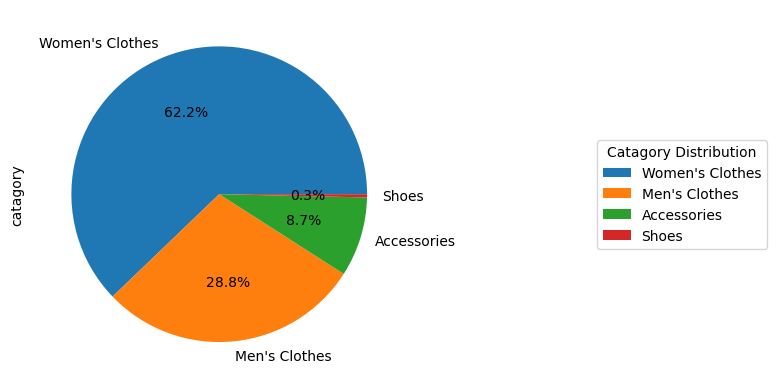

In [213]:
#product number in each catagory
lulu['catagory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(title="Catagory Distribution", loc="center right", bbox_to_anchor=(2, 0.5));

### 4.1.1 Catagory Distribution in Women

In [121]:
# sort women's clothes
lulu_women = lulu[lulu['catagory'] == "Women's Clothes"]

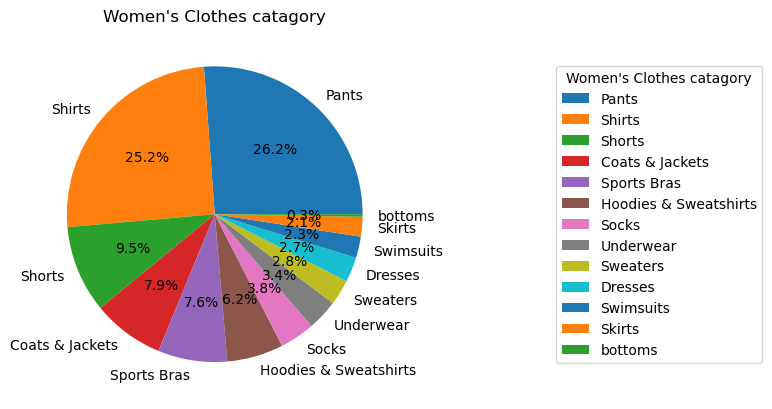

In [215]:
# count number of products in women's clothes and the distribution in each catagories
lulu_women['sub_cata_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Women's Clothes catagory", ylabel = "")
plt.legend(title="Women's Clothes catagory", loc="center right", bbox_to_anchor=(2, 0.5));

In [130]:
# check total sub_catagories
lulu_women['sub_cata_1'].unique()

array(['Coats & Jackets', 'Dresses', 'Hoodies & Sweatshirts', 'Pants',
       'Shirts', 'Shorts', 'Skirts', 'Socks', 'Sports Bras', 'Sweaters',
       'Swimsuits', 'Underwear', 'bottoms'], dtype=object)

In [141]:
# create a df for women's pants, which is the top 1 catagory in womens
women_pants = lulu_women[lulu_women['sub_cata_1'] == 'Pants']

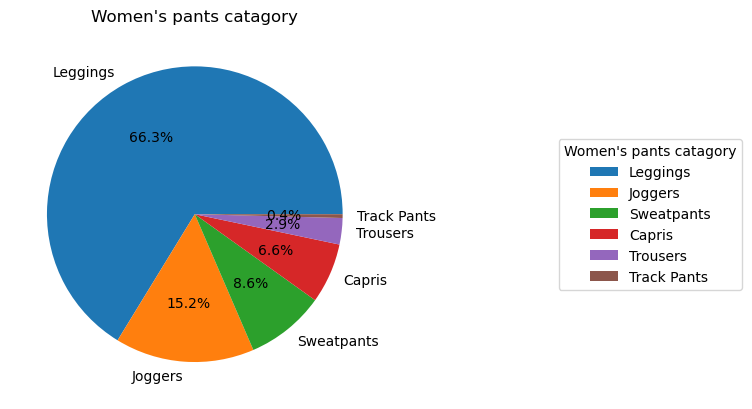

In [214]:
# counts the product number in each catagories of women's pants
women_pants['sub_cata_2'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Women's pants catagory", ylabel = "")
plt.legend(title="Women's pants catagory", loc="center right", bbox_to_anchor=(2, 0.5));

### 4.1.2 Catagory Distribution in Men

In [120]:
lulu_men = lulu[lulu['catagory'] == "Men's Clothes"]

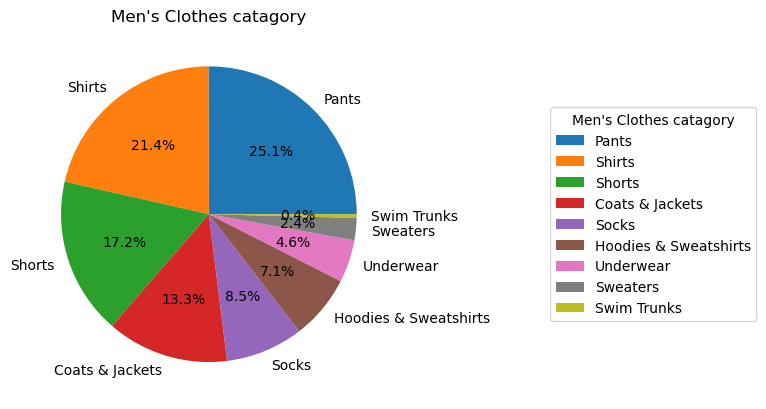

In [213]:
# plot men's clothes distribution in each catagory
lulu_men['sub_cata_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Men's Clothes catagory", ylabel = "")
plt.legend(title="Men's Clothes catagory", loc="center right", bbox_to_anchor=(2, 0.5));

In [145]:
men_pants = lulu_men[lulu_men['sub_cata_1'] == 'Pants']

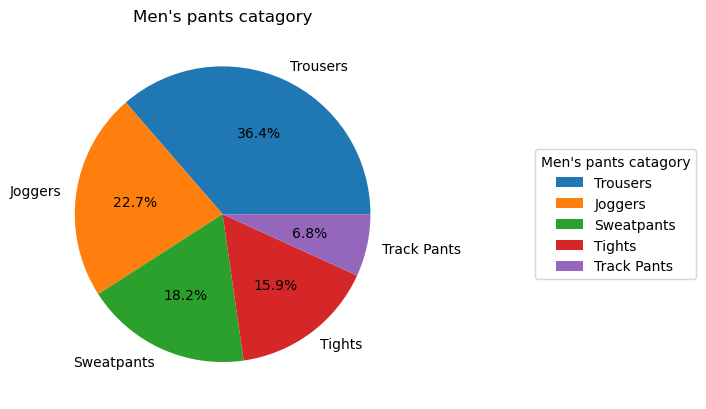

In [217]:
# filter men's pants
men_pants['sub_cata_2'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Men's pants catagory", ylabel = "")
plt.legend(title="Men's pants catagory", loc="center right", bbox_to_anchor=(1.8, 0.5));

In [163]:
# test table lulu
lulu

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
471,Accessories,Bags,NaN,Everywhere Belt Bag 1L,44.0,4.6,8182
472,Accessories,Bags,NaN,Never Lost Keychain,20.0,0.0,0
473,Accessories,Bags,NaN,Everywhere Belt Bag Large 2L,52.0,4.7,991
474,Accessories,Bags,NaN,All Night Festival Bag 5L,84.0,2.0,2
476,Accessories,Bags,NaN,City Adventurer Backpack Mini 11L,108.0,4.1,15
...,...,...,...,...,...,...,...
853,Women's Clothes,Underwear,NaN,InvisiWear Mid-Rise Bikini Underwear,14.0,2.1,71
861,Women's Clothes,Underwear,NaN,UnderEase Mid-Rise Cheeky Bikini Underwear 3 Pack,39.0,3.4,29
246,Women's Clothes,bottoms,Underwear,UnderEase Lace Mid-Rise Bikini Underwear 3 Pack,48.0,0.0,0
258,Women's Clothes,bottoms,Underwear,UnderEase Lace Mid-Rise Thong Underwear 3 Pack,48.0,0.0,0


### 4.2 Price range of products in each catagory

In [298]:
# Price analysis of catagory, groupby sub_cata_2 and aggregate max, median, min
price_women = lulu_women.groupby(['sub_cata_2'])['price'].aggregate(['max', 'median', 'min']).sort_values(by=['sub_cata_2'])

In [299]:
# check price_women
price_women

,max,median,min
sub_cata_2,,,
Bodysuits,138.0,106.0,59.0
Capris,279.0,83.5,49.0
Joggers,204.0,104.0,49.0
Leggings,198.0,88.0,39.0
Long Sleeve Shirts,148.0,68.0,29.0
Short Sleeve Shirts,78.0,49.0,34.0
Sweatpants,158.0,118.0,54.0
T-Shirts,98.0,49.0,24.0
Tank Tops,198.0,39.0,19.0


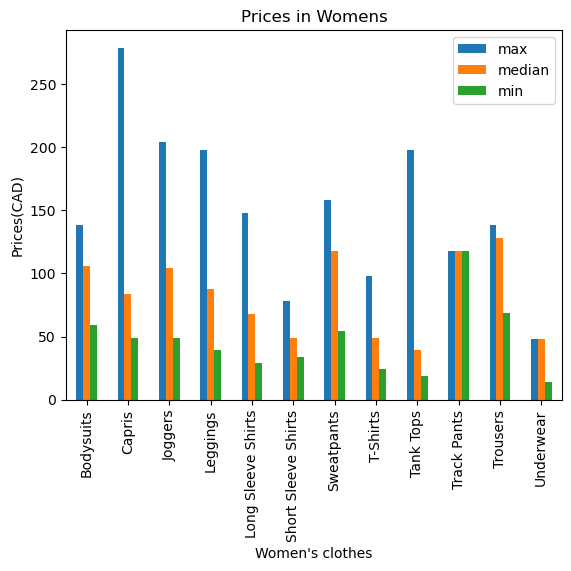

In [300]:
# bar plot for women's price
price_women.plot(kind = 'bar', xlabel = "Women's clothes", ylabel = 'Prices(CAD)', title = 'Prices in Womens');

In [296]:
# sort price for men's clothes
price_men = lulu_men.groupby(['sub_cata_2'])['price'].aggregate(['max', 'median', 'min']).sort_values(by=['sub_cata_2'])

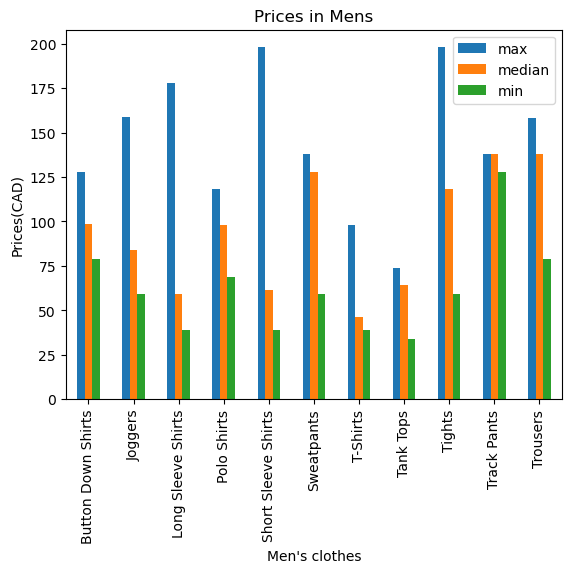

In [297]:
# bar plot for price_men
price_men.plot(kind = 'bar', xlabel = "Men's clothes", ylabel = 'Prices(CAD)', title = 'Prices in Mens');

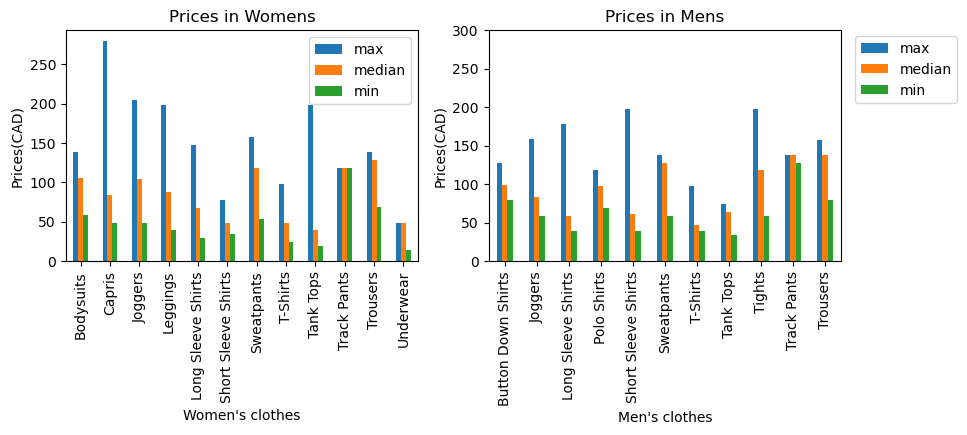

In [301]:
# Create a figure with a subplot that has two columns
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot the bar chart for women's clothes on the first subplot
price_women.plot(kind='bar', ax=axs[0], xlabel="Women's clothes", ylabel='Prices(CAD)', title='Prices in Womens')
plt.ylim([0, 300])

# Plot the bar chart for men's clothes on the second subplot
price_men.plot(kind='bar', ax=axs[1], xlabel="Men's clothes", ylabel='Prices(CAD)', title='Prices in Mens')
plt.legend(loc="center right", bbox_to_anchor=(1.35, 0.83))
plt.ylim([0, 300]);

### 4.3 Product review analysis

In [305]:
lulu.sort_values(by=['review'], ascending = False)

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
1456,Men's Clothes,Socks,NaN,Men's Power Stride Ankle Sock 3 Pack Stripe,38.0,5.0,2
1201,Men's Clothes,Hoodies & Sweatshirts,NaN,French Terry Oversized Half Zip,148.0,5.0,2
1440,Men's Clothes,Shorts,NaN,"Team Canada Pace Breaker Linerless Short 7"" CP...",68.0,5.0,1
1649,Men's Clothes,Coats & Jackets,NaN,New Year Quilted Light Insulation Jacket,139.0,5.0,1
1634,Men's Clothes,Coats & Jackets,NaN,New Year Quilted Light Insulation Vest,104.0,5.0,3
...,...,...,...,...,...,...,...
525,Accessories,Hats,NaN,Both Ways Reversible Bucket Hat,48.0,0.0,0
524,Accessories,Hats,NaN,Removable Sweatband All-Sport Visor,38.0,0.0,0
350,Women's Clothes,Sports Bras,NaN,lululemon lab Embossed Nulu Cross-Back Yoga Bra,98.0,0.0,0
1076,Women's Clothes,Shirts,T-Shirts,All Yours Cotton T-Shirt Pride,49.0,0.0,0


### 4.3.1 Catagory distribution of top reviewed products

In [33]:
# filter products that review over 4.5 and review_num more than 50
top_review = lulu[(lulu['review'] >= 4.5) & (lulu['review_num'] >= 100)]
top_review

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num,popularity
471,Accessories,Bags,NaN,Everywhere Belt Bag 1L,44.0,4.6,8182,high
473,Accessories,Bags,NaN,Everywhere Belt Bag Large 2L,52.0,4.7,991,high
480,Accessories,Bags,NaN,Mini Belt Bag,38.0,4.5,515,high
490,Accessories,Bags,NaN,City Adventurer Large Duffle Bag 29L,178.0,4.5,171,medium
519,Accessories,Bags,NaN,Go Getter Bag 2.0 25L,168.0,4.6,210,medium
...,...,...,...,...,...,...,...,...
36,Women's Clothes,Sports Bras,NaN,"Like a Cloud Longline Bra Light Support, D/DD Cup",74.0,4.6,381,medium
56,Women's Clothes,Sports Bras,NaN,"lululemon Align™ Bra Light Support, C/D Cup",58.0,4.5,173,medium
683,Women's Clothes,Sports Bras,NaN,"lululemon Align™ Bra Light Support, C/D Cup On...",29.0,4.5,173,medium
795,Women's Clothes,Sports Bras,NaN,"Like a Cloud Longline Bra Light Support, D/DD Cup",39.0,4.6,381,medium


In [34]:
# remove duplicates for top_review
top_review = top_review.drop_duplicates('product')

In [314]:
!pip3 install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [116]:
from wordcloud import WordCloud

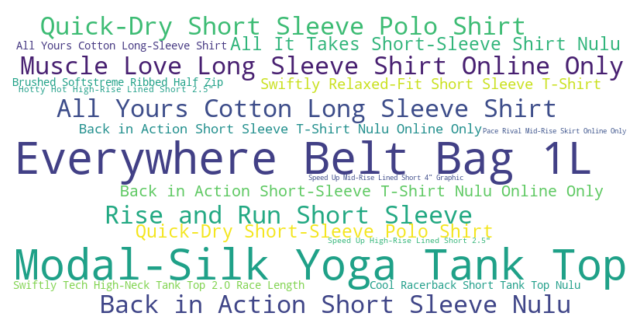

In [117]:
# use the value_counts method to get the frequency of each keyword in your desired column
keyword_counts = top_review['product'].value_counts()

# create a dictionary of the keyword frequencies
keyword_dict = keyword_counts.to_dict()

# create a wordcloud object with the keyword frequencies as input
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate_from_frequencies(keyword_dict)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# plot the wordcloud on the axis
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# show the plot
plt.show()

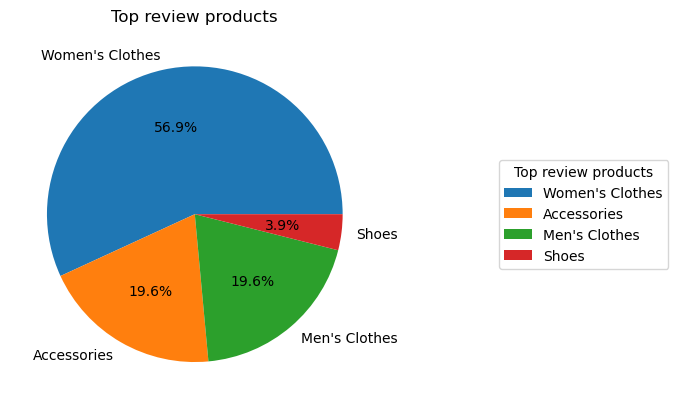

In [399]:
# top reviewed products distribution in catagories
top_review['catagory'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Top review products", ylabel = "")
plt.legend(title="Top review products", loc="center right", bbox_to_anchor=(1.8, 0.5));

### 4.3.2 Top reviewed products for womens

In [35]:
# filter top reviewed product for women's clothes
top_women = top_review[top_review['catagory'] == "Women's Clothes"]
top_women

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num,popularity
213,Women's Clothes,Coats & Jackets,NaN,Another Mile Vest Online Only,178.0,4.5,443,medium
251,Women's Clothes,Coats & Jackets,NaN,Wunder Puff Cropped Vest,228.0,4.6,381,medium
315,Women's Clothes,Coats & Jackets,NaN,Wunder Puff Cropped Jacket Online Only,278.0,4.7,260,medium
3,Women's Clothes,Hoodies & Sweatshirts,NaN,Scuba Oversized Funnel Neck Half Zip,118.0,4.5,1704,high
306,Women's Clothes,Hoodies & Sweatshirts,NaN,Brushed Softstreme Ribbed Half Zip,128.0,4.6,150,medium
796,Women's Clothes,Pants,Joggers,Loungeful High-Rise Jogger Full Length,99.0,4.5,141,medium
440,Women's Clothes,Shirts,Long Sleeve Shirts,Muscle Love Long Sleeve Shirt Online Only,78.0,4.6,109,medium
671,Women's Clothes,Shirts,Long Sleeve Shirts,All Yours Cotton Long Sleeve Shirt,49.0,4.5,228,medium
446,Women's Clothes,Shirts,Short Sleeve Shirts,Rise and Run Short Sleeve,68.0,4.7,102,medium
999,Women's Clothes,Shirts,Short Sleeve Shirts,Quick-Dry Short Sleeve Polo Shirt,49.0,4.5,137,medium


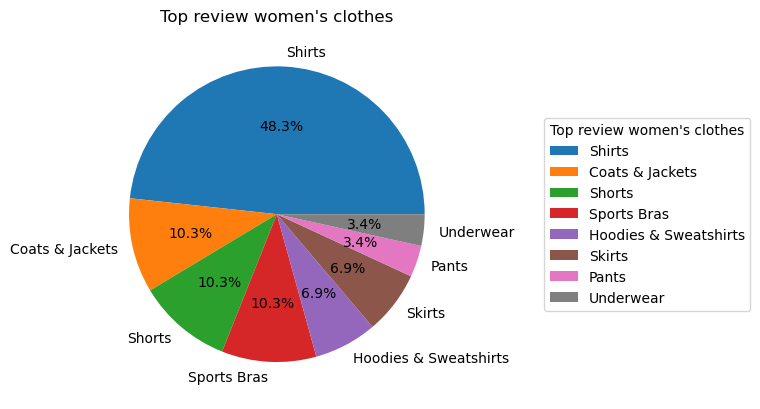

In [215]:
# top reviewed products's distribution in womens
top_women['sub_cata_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Top review women's clothes", ylabel = "")
plt.legend(title="Top review women's clothes", loc="center right", bbox_to_anchor=(1.8, 0.5));

In [128]:
# aggregation of top review women's clothes
price_in_top_women = top_women.groupby(['sub_cata_1'])['price'].aggregate(['max', 'median', 'min']).sort_values(by=['sub_cata_1'])

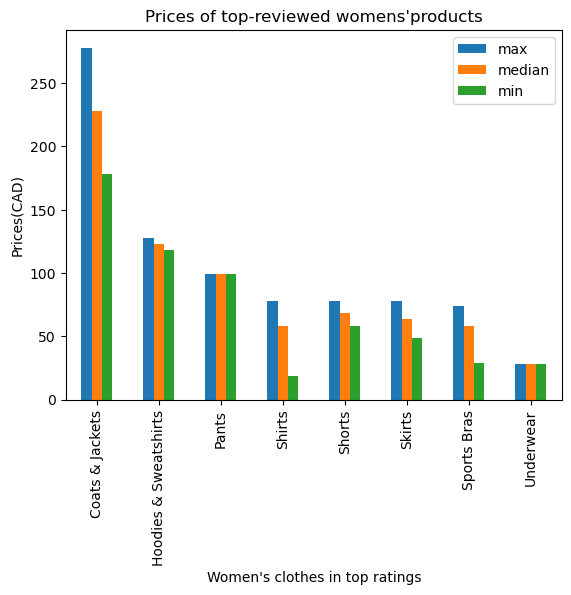

In [403]:
# plot prices of top reviewed women's clothes
price_in_top_women.plot(kind = 'bar', xlabel = "Women's clothes in top ratings", ylabel = 'Prices(CAD)', title = "Prices of top-reviewed womens'products");

### 4.3.3 Price of women's clothes filtered by top review

In [122]:
women_cata1 = lulu_women.groupby(['sub_cata_1'])['price'].aggregate(['max', 'median', 'min']).sort_values(by=['sub_cata_1'])

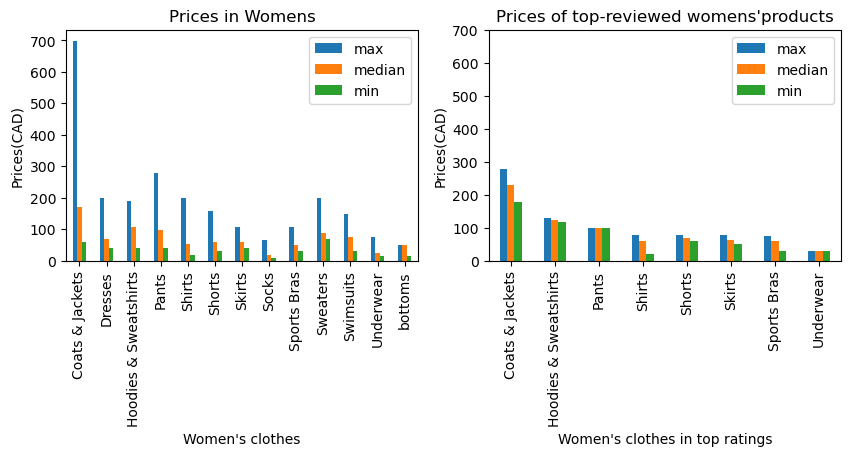

In [129]:
# Create a figure with a subplot that has two columns
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot the bar chart for women's clothes on the first subplot
women_cata1.plot(kind='bar', ax=axs[0], xlabel="Women's clothes", ylabel='Prices(CAD)', title='Prices in Womens')

# Plot the bar chart for women's clothes in top ratings on the second subplot
price_in_top_women.plot(kind = 'bar', ax=axs[1], xlabel = "Women's clothes in top ratings", ylabel = 'Prices(CAD)', title = "Prices of top-reviewed womens'products")
plt.ylim([0, 700]);

In [406]:
# top 5 products in each catagory of top reviewed products
top_products = top_review.groupby('catagory').apply(lambda x: x.nlargest(5, 'review')).reset_index(drop=True)
top_products

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
0,Accessories,Yoga Accessories,NaN,Lift and Lengthen Yoga Block Marbled,28.0,4.8,111
1,Accessories,Bags,NaN,Everywhere Belt Bag Large 2L,52.0,4.7,991
2,Accessories,Bags,NaN,New Parent Backpack 17L Online Only,218.0,4.7,191
3,Accessories,Bags,NaN,Everywhere Belt Bag 1L,44.0,4.6,8182
4,Accessories,Bags,NaN,Go Getter Bag 2.0 25L,168.0,4.6,210
5,Men's Clothes,Hoodies & Sweatshirts,NaN,Oversized-Fit Fleece Half Zip,158.0,4.7,143
6,Men's Clothes,Pants,Trousers,"Commission Classic-Fit Pant 37"" Warpstreme Onl...",138.0,4.6,128
7,Men's Clothes,Shirts,Short Sleeve Shirts,Relaxed-Fit Training Short Sleeve Shirt,49.0,4.6,113
8,Men's Clothes,Pants,Sweatpants,"Balancer Pant 27""",138.0,4.5,108
9,Men's Clothes,Pants,Trousers,"ABC Classic-Fit Pant 30"" Warpstreme Online Only",138.0,4.5,345


In [13]:
# review distribution of all the products
lulu_review = lulu[lulu['review'] != 0].groupby(['sub_cata_2'])['review'].aggregate(['max', 'median', 'min'])
lulu_review

,max,median,min
sub_cata_2,,,
Bodysuits,4.3,3.95,3.2
Button Down Shirts,4.6,3.90,3.6
Capris,4.5,4.00,2.9
Joggers,5.0,4.20,3.0
Leggings,5.0,4.00,2.5
Long Sleeve Shirts,5.0,4.10,1.3
Polo Shirts,4.0,3.50,2.0
Short Sleeve Shirts,5.0,4.00,1.0
Sweatpants,4.5,4.00,3.3


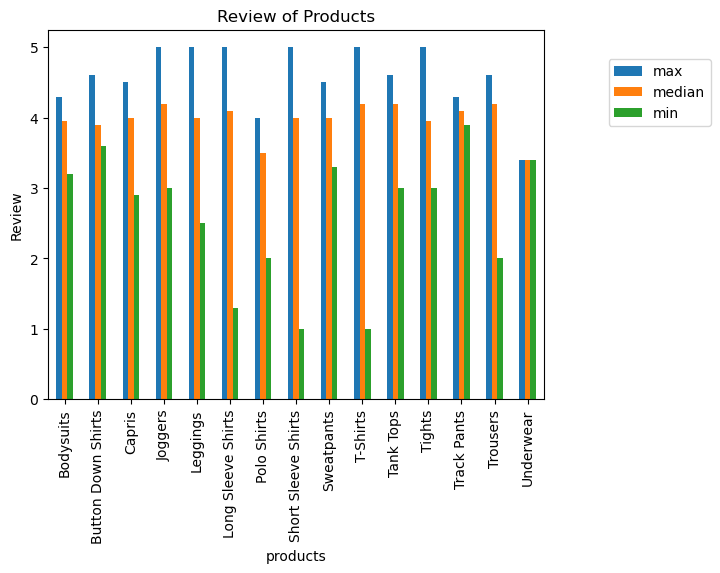

In [14]:
# plot review of products in each catagory
lulu_review.plot(kind = 'bar', xlabel = "products", ylabel = 'Review', title = "Review of Products")
plt.legend(loc="center right", bbox_to_anchor=(1.35, 0.83));

### 4.4 Relation of prices and reviews for most populared products

In [409]:
lulu.sort_values(by = 'review_num', ascending = False)

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num
585,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Pant 25"" Shine",69.0,3.5,17333
8,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Pant 28""",98.0,3.5,15768
580,Women's Clothes,Pants,Leggings,"lululemon Align™ High-Rise Pant 28""",39.0,3.5,15768
471,Accessories,Bags,NaN,Everywhere Belt Bag 1L,44.0,4.6,8182
29,Women's Clothes,Pants,Leggings,"Wunder Train High-Rise Tight 25""",98.0,4.1,6102
...,...,...,...,...,...,...,...
1287,Men's Clothes,Underwear,NaN,"Rapid Vent Tech Boxer 5"" 3 Pack Online Only",98.0,0.0,0
612,Women's Clothes,Sports Bras,NaN,"Enlite Weave-Back Bra High Support, A–DDD(E) C...",49.0,0.0,0
552,Accessories,Hats,NaN,Women's Fast and Free Ponytail Running Hat Vent,48.0,0.0,0
946,Women's Clothes,Shirts,Bodysuits,SenseKnit Running One-Piece,99.0,0.0,0


In [12]:
# define popularity using review number 
popularity = []
for num in lulu['review_num']:
    if 50 < num < 100:
        popularity.append('low')
    elif 100 < num < 500:
        popularity.append('medium')
    elif num > 500:
        popularity.append('high')
    else:
        popularity.append('unknown')

In [13]:
# create a column of popularity
lulu['popularity'] = popularity
lulu

,catagory,sub_cata_1,sub_cata_2,product,price,review,review_num,popularity
471,Accessories,Bags,NaN,Everywhere Belt Bag 1L,44.0,4.6,8182,high
472,Accessories,Bags,NaN,Never Lost Keychain,20.0,0.0,0,unknown
473,Accessories,Bags,NaN,Everywhere Belt Bag Large 2L,52.0,4.7,991,high
474,Accessories,Bags,NaN,All Night Festival Bag 5L,84.0,2.0,2,unknown
476,Accessories,Bags,NaN,City Adventurer Backpack Mini 11L,108.0,4.1,15,unknown
...,...,...,...,...,...,...,...,...
853,Women's Clothes,Underwear,NaN,InvisiWear Mid-Rise Bikini Underwear,14.0,2.1,71,low
861,Women's Clothes,Underwear,NaN,UnderEase Mid-Rise Cheeky Bikini Underwear 3 Pack,39.0,3.4,29,unknown
246,Women's Clothes,bottoms,Underwear,UnderEase Lace Mid-Rise Bikini Underwear 3 Pack,48.0,0.0,0,unknown
258,Women's Clothes,bottoms,Underwear,UnderEase Lace Mid-Rise Thong Underwear 3 Pack,48.0,0.0,0,unknown


In [59]:
# create pivot table to show the price regarding to popularity and catagory 
lulu.pivot_table('price', index = 'popularity', columns ='sub_cata_2', aggfunc = 'mean' )

sub_cata_2,Bodysuits,Button Down Shirts,Capris,Joggers,Leggings,Long Sleeve Shirts,Polo Shirts,Short Sleeve Shirts,Sweatpants,T-Shirts,Tank Tops,Tights,Track Pants,Trousers,Underwear
popularity,,,,,,,,,,,,,,,
high,NaN,NaN,69.000000,88.500000,80.297872,63.000000,NaN,58.636364,106.285714,45.166667,42.117647,NaN,118.0,118.250000,NaN
low,109.000,NaN,79.000000,107.727273,92.318182,57.500000,69.0,78.200000,101.500000,49.555556,45.000000,98.333333,138.0,124.500000,NaN
medium,104.000,103.5,91.666667,112.333333,89.195122,69.074074,93.5,62.500000,103.842105,49.800000,41.750000,138.000000,136.0,126.736842,NaN
unknown,102.375,98.5,105.800000,110.166667,102.431373,73.206897,108.0,62.500000,106.666667,56.441176,53.037037,119.857143,NaN,141.875000,36.666667


In [70]:
populars = lulu[lulu['popularity'] == 'high'].groupby('sub_cata_2')[['price']].mean()

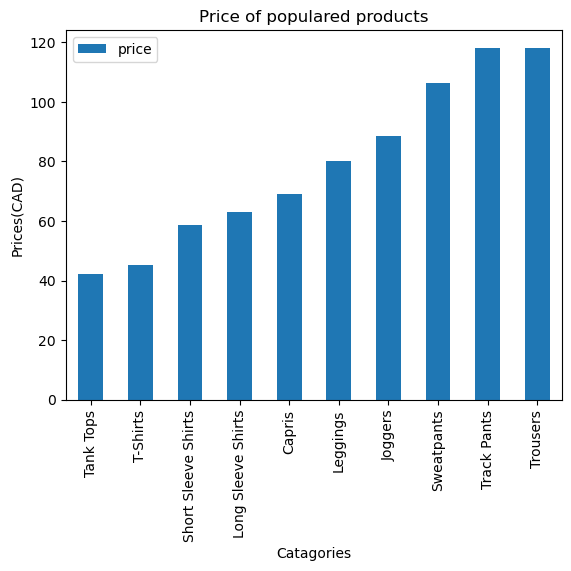

In [71]:
# price of populared products
populars.sort_values('price').plot(kind = 'bar', xlabel = "Catagories", ylabel = 'Prices(CAD)', title = "Price of populared products");

In [72]:
populars_rating = lulu[lulu['popularity'] == 'high'].groupby('sub_cata_2')[['review']].mean()

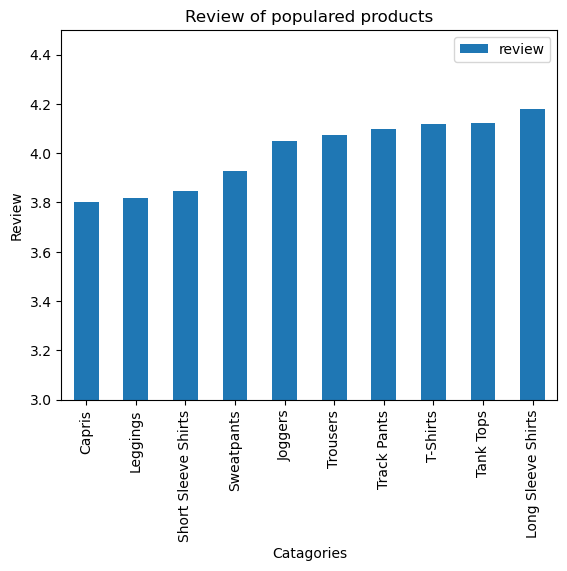

In [73]:
# rating of populared products
populars_rating.sort_values('review').plot(kind = 'bar', xlabel = "Catagories", ylabel = 'Review', title = "Review of populared products")
plt.ylim([3, 4.5]);

In [14]:
# create a df data which refer to the popularity is high and groupby sub_cata_2
data = lulu[lulu['popularity'] == 'high'].groupby('sub_cata_2')[['price', 'review']].mean().sort_values(by = 'price')
data

,price,review
sub_cata_2,,
Tank Tops,42.117647,4.123529
T-Shirts,45.166667,4.116667
Short Sleeve Shirts,58.636364,3.845455
Long Sleeve Shirts,63.000000,4.180000
Capris,69.000000,3.800000
Leggings,80.297872,3.819149
Joggers,88.500000,4.050000
Sweatpants,106.285714,3.928571
Track Pants,118.000000,4.100000


<Figure size 640x480 with 0 Axes>

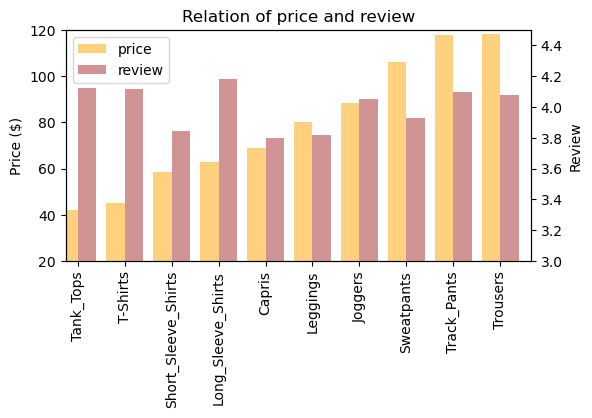

In [26]:
from io import StringIO

s = StringIO(""" price review
Tank_Tops 42.117647 4.123529
T-Shirts 45.166667 4.116667
Short_Sleeve_Shirts 58.636364 3.845455
Long_Sleeve_Shirts 63.000000 4.180000
Capris 69.000000 3.800000
Leggings 80.297872 3.819149
Joggers 88.500000 4.050000
Sweatpants 106.285714 3.928571
Track_Pants 118.000000 4.100000
Trousers 118.250000 4.075000""")

#read data as StringIO
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure
fig = plt.figure(figsize=(6, 3)) # Create matplotlib figure with width of 16 inches and height of 8 inches


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# plot in bar chart and set color, transparency and position
width = 0.4
df.price.plot(kind='bar', color='orange', alpha=0.5, ax=ax, width=width, position=1)
df.review.plot(kind='bar', color='brown', alpha=0.5, ax=ax2, width=width, position=0)

# set y label and data range
ax.set_ylabel('Price ($)')
ax.set_ylim([20, 120])
ax2.set_ylabel('Review')
ax2.set_ylim([3, 4.5])

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax.set_title('Relation of price and review')

plt.show();

### 4.5 Relation of Review and Review amounts

In [17]:
filtered = lulu[(lulu['review_num']>100) & (lulu['review_num'] < 5000)]

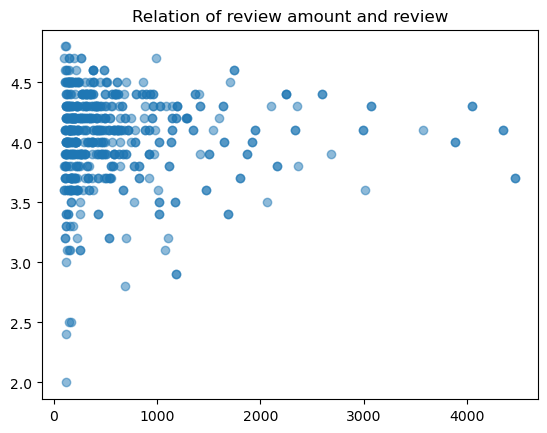

In [24]:
plt.plot(filtered['review_num'], filtered['review'], 'o', alpha = 0.5)
plt.title('Relation of review amount and review');

In [22]:
import seaborn as sns

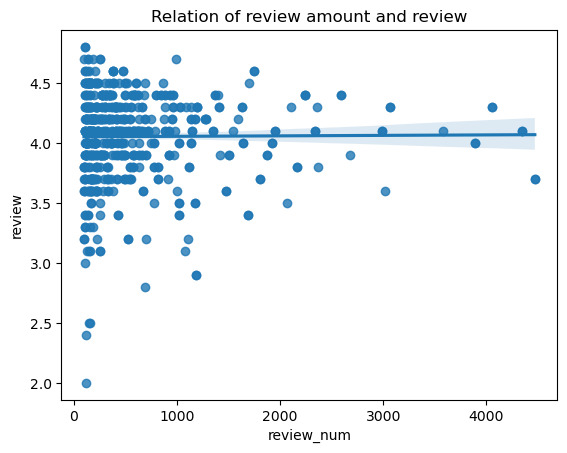

In [49]:
ax = sns.regplot(filtered['review_num'], filtered['review'])
ax.set_title('Relation of review amount and review');